In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn

torch.__version__

'2.1.2'

In [19]:
# set up random data set

In [5]:
# practise with known parameter
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias

len(X), y[:10]

(50,
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
# split data set to train and test data
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [17]:
# create visualize function
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """Plot training data, test data, compares predictions"""
    plt.figure(figsize=(10, 7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="train_data")
    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="test_data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    # show the legend
    plt.legend(prop={"size":12});

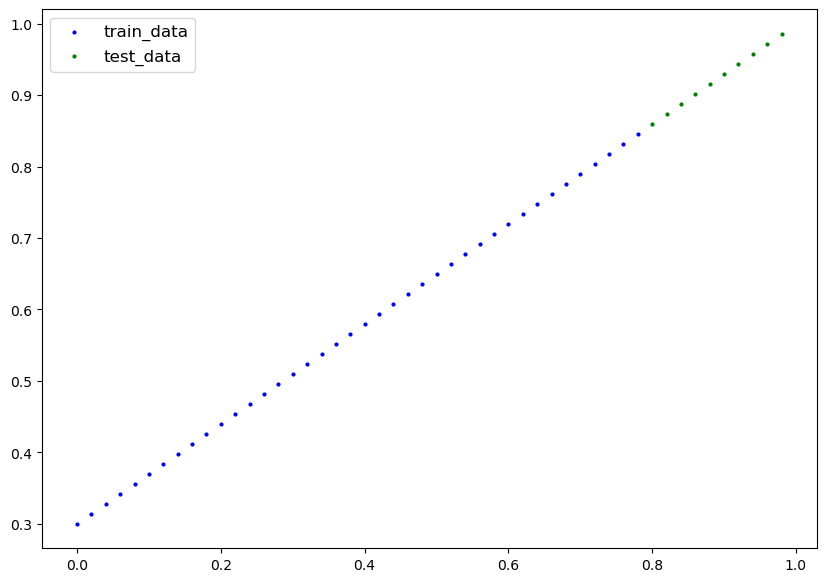

In [18]:
plot_predictions()

In [21]:
# build a model with pytorch

In [31]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [28]:
# 通过梯度下降和反向传播更新初始随机参数
# require_grad: torch.autograd
# forward: define the method of computation
# torch.optim: pytorch optimizers
# torch.Parameter: all the tensors saved with nn.Module
# torch.nn: all the blocks in there
# pytorch cheat sheet:
# https://pytorch.org/tutorials/beginner/ptcheat.html

In [52]:
# create a model instance by the class made above
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [53]:
model_0.state_dict()  # check the weight and bias

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [54]:
# with the model_0, how to predict data
with torch.inference_mode():
    y_preds = model_0(X_test)

In [55]:
y_preds, X_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]))

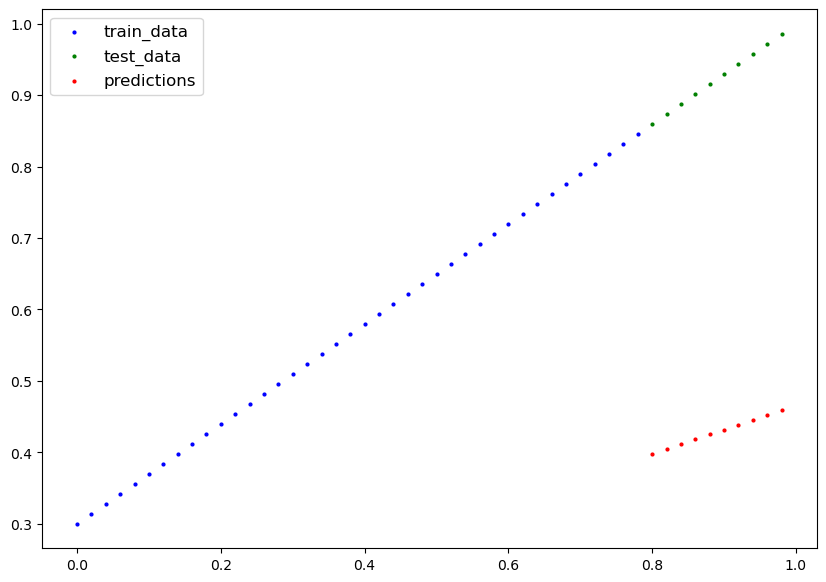

In [56]:
plot_predictions(predictions=y_preds)

In [57]:
# let's train it!
# create loss function
loss_fn = nn.L1Loss() # mae loss

# create optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)  # gradient: 下山的梯度，导数，坡度，导数为0，loss也为0了

In [58]:
# model有很多mode
# torch.inference_mode()推理模式
# model.train()训练模式
# model.eval()测试模式

In [59]:
# create train loop and test loop
torch.manual_seed(42)

train_loss_values = []
test_loss_values = []
epoch_count = []

epochs = 200

for epoch in range(epochs):
    # set to train mode
    model_0.train()
    
    # five steps to train
    # 1. train
    y_pred = model_0(X_train)
    # 2. calculate the loss
    loss = loss_fn(y_pred, y_train)
    # 3. set the gradient to zero
    optimizer.zero_grad()
    # 4. backward the loss
    loss.backward()
    # 5. update weights
    optimizer.step()

    # set to evaluation mode
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass the test data
        test_pred = model_0(X_test)
        # 2. calculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        # print out what happens
        if epoch % 10 == 0:
            print(f"Epoch: {epoch}, MAE loss: {loss}, MAE test loss: {test_loss}")
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

Epoch: 0, MAE loss: 0.31288138031959534, MAE test loss: 0.48106518387794495
Epoch: 10, MAE loss: 0.1976713240146637, MAE test loss: 0.3463551998138428
Epoch: 20, MAE loss: 0.08908725529909134, MAE test loss: 0.21729660034179688
Epoch: 30, MAE loss: 0.053148526698350906, MAE test loss: 0.14464017748832703
Epoch: 40, MAE loss: 0.04543796554207802, MAE test loss: 0.11360953003168106
Epoch: 50, MAE loss: 0.04167863354086876, MAE test loss: 0.09919948130846024
Epoch: 60, MAE loss: 0.03818932920694351, MAE test loss: 0.08886633068323135
Epoch: 70, MAE loss: 0.03476089984178543, MAE test loss: 0.0805937647819519
Epoch: 80, MAE loss: 0.03132382780313492, MAE test loss: 0.07232122868299484
Epoch: 90, MAE loss: 0.02788740023970604, MAE test loss: 0.06473556160926819
Epoch: 100, MAE loss: 0.024458957836031914, MAE test loss: 0.05646304413676262
Epoch: 110, MAE loss: 0.021020209416747093, MAE test loss: 0.04819049686193466
Epoch: 120, MAE loss: 0.01758546754717827, MAE test loss: 0.040604822337627

In [60]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

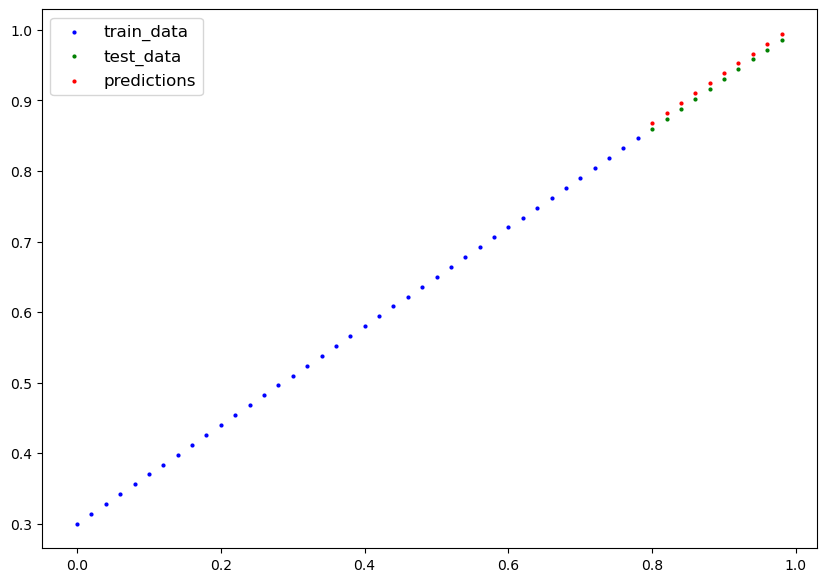

In [70]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

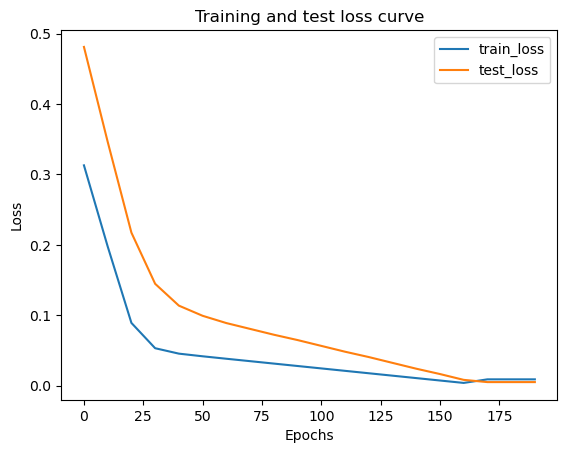

In [71]:
# plot the loss curve
plt.plot(epoch_count, train_loss_values, label="train_loss")
plt.plot(epoch_count, test_loss_values, label="test_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and test loss curve")
plt.legend();

In [73]:
# save models
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "01_pytorch_wf_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model parameters to {MODEL_SAVE_PATH}...")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model parameters to models/01_pytorch_wf_model_0.pth...


In [74]:
# load model using torch.nn.Module.load_state_dict(torch.load(f))
# load model parameters, create a new model instance and pass the parameters to it.
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [76]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [77]:
# they are the same

In [78]:
# use another module : nn.Linear(in_features, out_features)
from torch import nn
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [93]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [85]:
# put the model on gpu device if i have, but i don't so
# check model device
next(model_1.parameters()).device
# set to gpu
# model_1.to(device)

device(type='cpu')

In [94]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [95]:
# train model_1
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    # train model
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # eval model
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train_loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train_loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train_loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train_loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 300 | Train_loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 400 | Train_loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 500 | Train_loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 600 | Train_loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 700 | Train_loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 800 | Train_loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 900 | Train_loss: 0.0012645028764382005 | Test loss: 0.013801807537674904


In [96]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [98]:
# make predictions
model_1.eval()
with torch.inference_mode():
    model_1_preds = model_1(X_test)

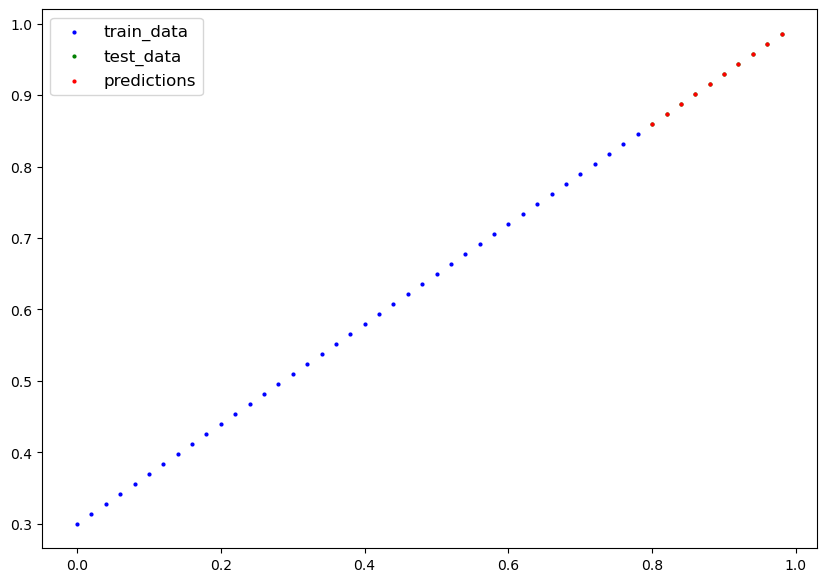

In [100]:
plot_predictions(predictions=model_1_preds)
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
# plot_predictions(predictions=y_preds.cpu())

In [101]:
# save models
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "01_pytorch_wf_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model parameters to {MODEL_SAVE_PATH}...")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model parameters to models/01_pytorch_wf_model_1.pth...
